In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.font_manager as fm 
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc' 
font = fm.FontProperties(fname=font_path).get_name() 
matplotlib.rc('font', family=font) 

In [3]:
df = pd.read_csv('../../data/상권변화_자치구.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준_년분기_코드        650 non-null    int64  
 1   자치구_코드           650 non-null    int64  
 2   자치구_코드_명         650 non-null    object 
 3   상권_변화_지표         650 non-null    object 
 4   상권_변화_지표_명       650 non-null    object 
 5   운영_영업_개월_평균      650 non-null    float64
 6   폐업_영업_개월_평균      650 non-null    float64
 7   서울시_운영_영업_개월_평균  650 non-null    float64
 8   서울시_폐업_영업_개월_평균  650 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 45.8+ KB


In [5]:
df.describe()

,기준_년분기_코드,자치구_코드,운영_영업_개월_평균,폐업_영업_개월_평균,서울시_운영_영업_개월_평균,서울시_폐업_영업_개월_평균
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,20220.115385,11416.600000,98.566154,50.140000,98.615385,50.153846
std,18.789088,186.485772,10.192875,3.763473,6.030718,1.460637
min,20191.000000,11110.000000,76.000000,45.000000,92.000000,48.000000
25%,20203.000000,11260.000000,91.000000,48.000000,93.000000,49.000000
50%,20221.500000,11410.000000,97.000000,49.000000,97.500000,50.000000
75%,20234.000000,11560.000000,105.000000,52.000000,102.000000,51.000000
max,20252.000000,11740.000000,134.000000,63.000000,112.000000,53.000000


In [6]:
# 불필요한 column 제거
drop_col = ['자치구_코드', '상권_변화_지표_명']
df = df.drop(drop_col, axis=1)

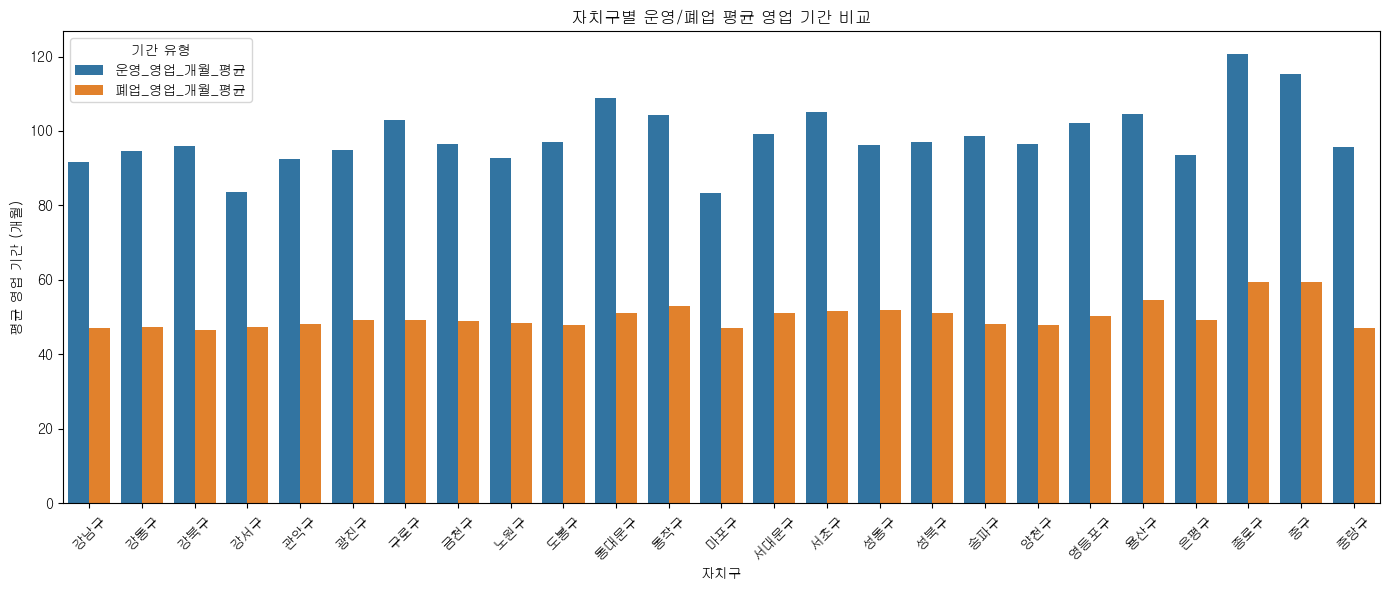

In [7]:
# 자치구별 운영/폐업 영업 기간 비교 시각화
grouped = df.groupby('자치구_코드_명')[['운영_영업_개월_평균', '폐업_영업_개월_평균']].mean().reset_index()

melted = grouped.melt(id_vars='자치구_코드_명', var_name='기간유형', value_name='평균영업개월')

plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x='자치구_코드_명', y='평균영업개월', hue='기간유형')
plt.title('자치구별 운영/폐업 평균 영업 기간 비교')
plt.xlabel('자치구')
plt.ylabel('평균 영업 기간 (개월)')
plt.xticks(rotation=45)
plt.legend(title='기간 유형')
plt.tight_layout()
plt.show()

In [8]:
# 운영 기간 대비 폐업 기간이 가장 빠른 자치구 확인
df['운영_대비_폐업_비율'] = df['폐업_영업_개월_평균'] / df['운영_영업_개월_평균']

# 비율 기준 오름차순 정렬
df_sorted = df.sort_values('운영_대비_폐업_비율')

# 상위 10개 확인
fastest_closures = df_sorted.head(10)

print(fastest_closures[['자치구_코드_명', '상권_변화_지표', '운영_영업_개월_평균', '폐업_영업_개월_평균', '운영_대비_폐업_비율']])

    자치구_코드_명 상권_변화_지표  운영_영업_개월_평균  폐업_영업_개월_평균  운영_대비_폐업_비율
95       구로구       HL        120.0         52.0     0.433333
68       구로구       HL        118.0         52.0     0.440678
90      동대문구       HH        122.0         54.0     0.442623
84       강북구       LL        110.0         49.0     0.445455
45       구로구       HL        116.0         52.0     0.448276
74      동대문구       HH        120.0         54.0     0.450000
89       양천구       LL        111.0         50.0     0.450450
94       송파구       HL        113.0         51.0     0.451327
109      구로구       HL        113.0         51.0     0.451327
33       강북구       LL        106.0         48.0     0.452830


C:\Users\Playdata\AppData\Local\Temp\ipykernel_8980\2404224016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='자치구_코드_명', y='운영_대비_폐업_비율', palette='Reds_r') # 그래프 색이 진할수록 운영기간 대비 폐업이 빠름


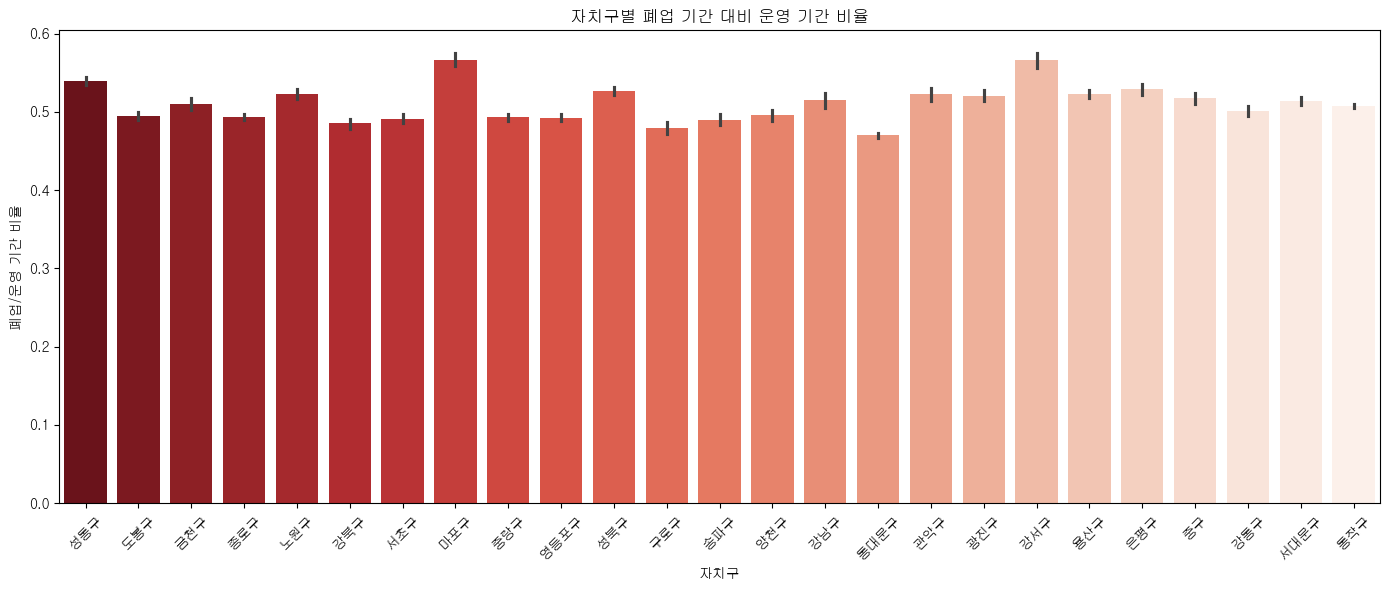

In [9]:
# 시각화
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='자치구_코드_명', y='운영_대비_폐업_비율', palette='Reds_r') # 그래프 색이 진할수록 운영기간 대비 폐업이 빠름
plt.title('자치구별 폐업 기간 대비 운영 기간 비율')
plt.ylabel('폐업/운영 기간 비율')
plt.xlabel('자치구')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

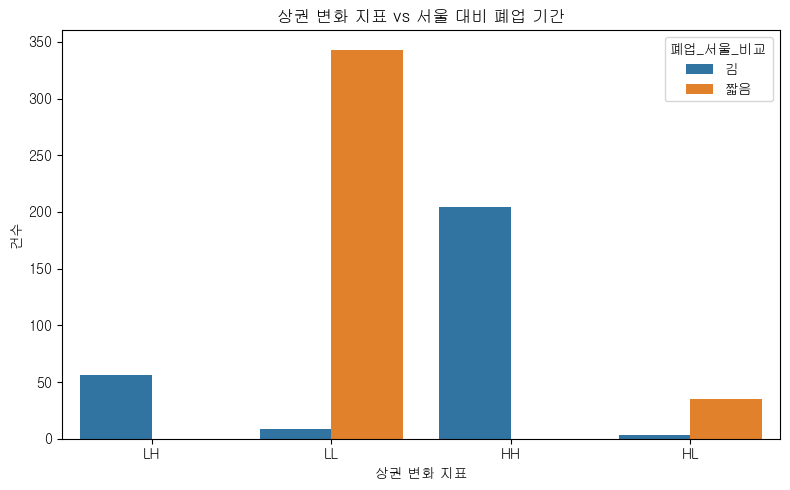

In [10]:
# 상권 변화 지표별로 폐업 기간이 짧은/긴 분포 확인
df['폐업_서울_대비'] = df['폐업_영업_개월_평균'] - df['서울시_폐업_영업_개월_평균']
df['폐업_서울_비교'] = df['폐업_서울_대비'].apply(lambda x: '짧음' if x < 0 else '김') # 서울 평균보다 폐업 기간이 짧거나 긴 상태를 나타냄

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='상권_변화_지표', hue='폐업_서울_비교')
plt.title('상권 변화 지표 vs 서울 대비 폐업 기간')
plt.xlabel('상권 변화 지표')
plt.ylabel('건수')
plt.tight_layout()
plt.show()

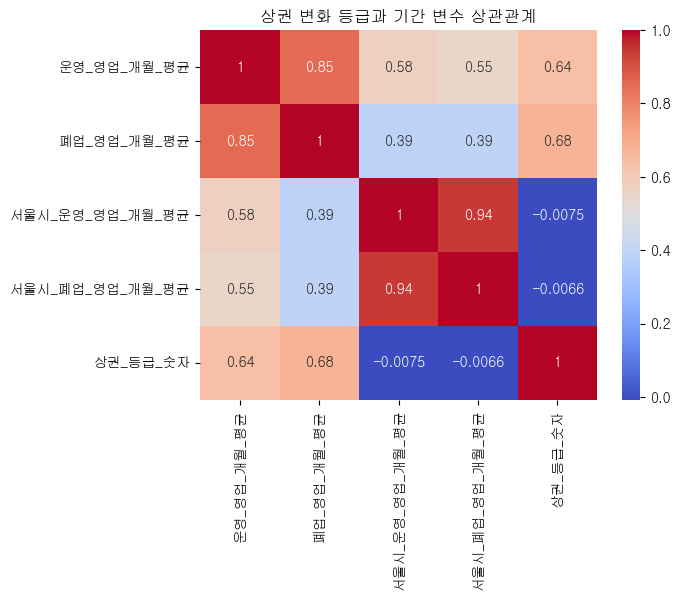

In [11]:
# 싱권 변화 지표의 상관관계 확인
# 상권 등급을 숫자로 매핑 (LL=0, LH=1, HL=2, HH=3)
grade_map = {'LL': 0, 'LH': 1, 'HL': 2, 'HH': 3}
df['상권_등급_숫자'] = df['상권_변화_지표'].map(grade_map)

# 시각화
corr = df[['운영_영업_개월_평균', '폐업_영업_개월_평균', '서울시_운영_영업_개월_평균', '서울시_폐업_영업_개월_평균', '상권_등급_숫자']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('상권 변화 등급과 기간 변수 상관관계')
plt.show()

In [12]:
# 시각화를 위해 생성한 컬럼 제거
drop_new_col = ['운영_대비_폐업_비율', '폐업_서울_대비', '폐업_서울_비교', '상권_등급_숫자']
df = df.drop(drop_new_col, axis=1)

In [13]:
# 데이터 저장
df.sort_values('기준_년분기_코드', inplace=True)
df.to_csv('./../data/commercial_change_data.csv')